In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import numpy as np
from random import randint

plt.style.use(["Solarize_Light2"])
plt.rcParams["axes.edgecolor"] = "#66818c"
plt.rcParams["axes.facecolor"] = "#263238"
plt.rcParams["figure.facecolor"] = "#263238"
plt.rcParams["grid.color"] = "#3f575b"
plt.rcParams["xtick.color"] = "#bfd5dd"
plt.rcParams["ytick.color"] = "#bfd5dd"
plt.rcParams["text.color"] = "#bfd5dd"
plt.rcParams["axes.labelcolor"] = "#bfd5dd"

engine = create_engine("postgresql+psycopg2://{}:{}@{}:{}/{}".format())
table_name = "building"

In [31]:
query = """ SELECT COUNT(id)
            FROM {}
            WHERE district IS NULL
        """.format(table_name)
engine.execute(query).fetchone()

(13,)

In [32]:
query = """ SELECT lat,
                   lng,
                   district
            FROM {}
            WHERE district > -1
        """.format(table_name)
df = pd.read_sql(query, engine)

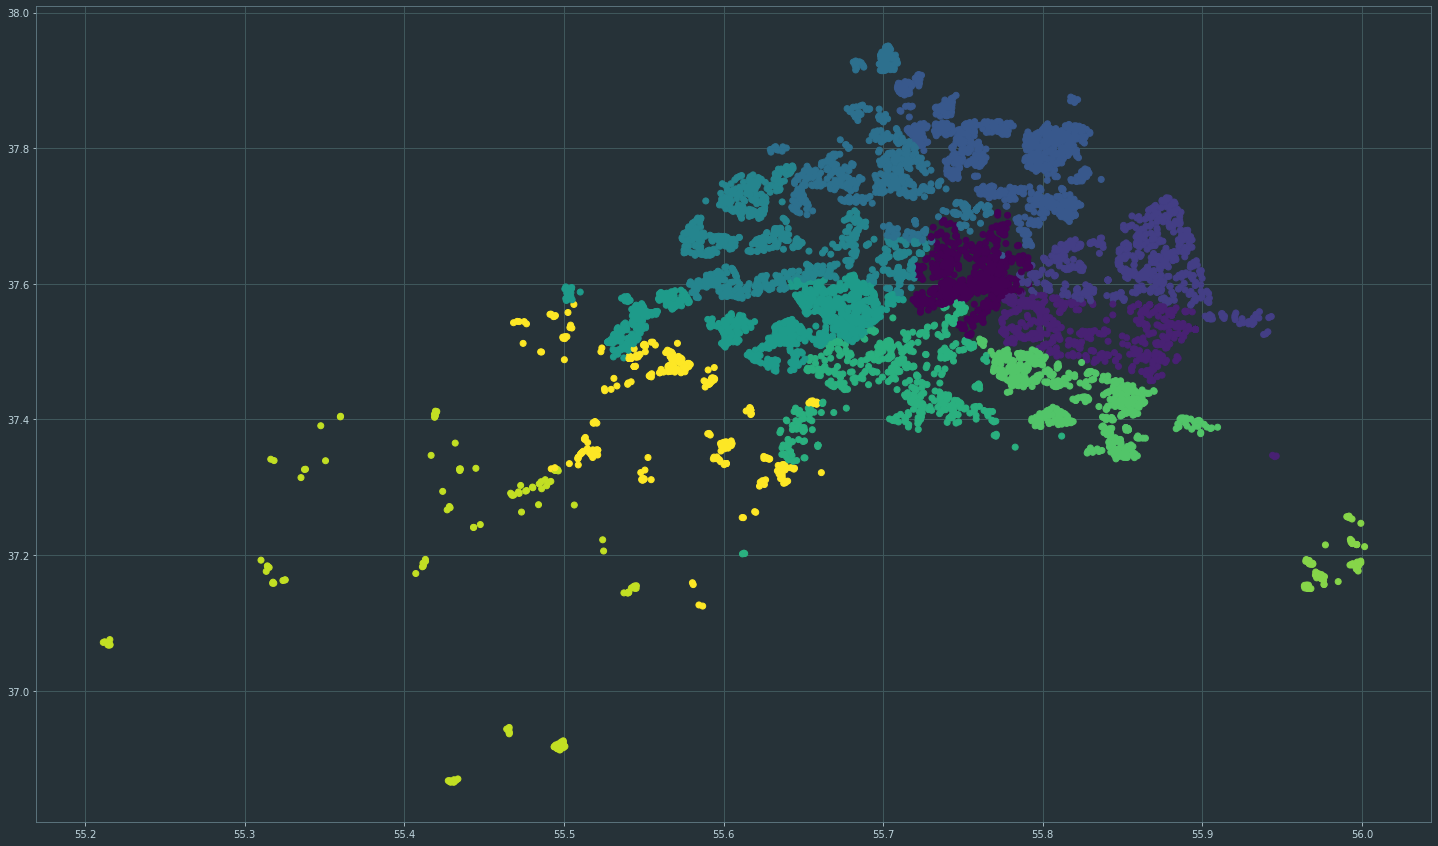

In [33]:
plt.figure(figsize=(25, 15))
plt.scatter(df.lat, df.lng, c=df.district);

In [40]:
table_name = "flat"
query = """ SELECT owner_type,
                   area,
                   area_kitchen,
                   area_living,
                   floor,
                   rooms,
                   layout,
                   height,
                   bathrooms,
                   window_types,
                   balconies,
                   condition,
                   price,
                   type,
                   year,
                   material,
                   floors,
                   garbage_chute,
                   heating_type,
                   district
            FROM {}
            INNER JOIN building ON flat.building_id = building.id
            WHERE district > -1
        """.format(table_name)
df = pd.read_sql(query, engine)
df.loc[:, "ppm"] = df.price / df.area
df.drop("price", axis=True, inplace=True)
df.loc[:, "window_0"] = df.window_types.apply(lambda i: None if i is None else i[0])
df.loc[:, "window_1"] = df.window_types.apply(lambda i: None if i is None else i[1])
df[["window_1", "window_0"]] = df[["window_1", "window_0"]].fillna(0)
df.drop("window_types", axis=True, inplace=True)
df.loc[:, "bathrooms_0"] = df.bathrooms.apply(lambda i: None if i is None else i[0])
df.loc[:, "bathrooms_1"] = df.bathrooms.apply(lambda i: None if i is None else i[1])
df[["bathrooms_0", "bathrooms_1"]] = df[["bathrooms_0", "bathrooms_1"]].fillna(0)
df.drop("bathrooms", axis=True, inplace=True)
df.loc[:, "balconies_0"] = df.balconies.apply(lambda i: None if i is None else i[0])
df.loc[:, "balconies_1"] = df.balconies.apply(lambda i: None if i is None else i[1])
df[["balconies_0", "balconies_1"]] = df[["balconies_0", "balconies_1"]].fillna(0)
df.drop("balconies", axis=True, inplace=True)
df.loc[~df.garbage_chute.isnull() & df.garbage_chute, "garbage_chute_1"] = 1
df.loc[~df.garbage_chute.isnull() & df.garbage_chute == False, "garbage_chute_0"] = 1
df.loc[:, "garbage_chute_0"] = df.loc[:, "garbage_chute_0"].fillna(0)
df.loc[:, "garbage_chute_1"] = df.loc[:, "garbage_chute_1"].fillna(0)
df.drop("garbage_chute", axis=True, inplace=True)
for i in df.type.unique():
    if i >= .0:
        df.loc[df.type == i, "type_"+str(i)] = 1
        df.loc[:, "type_"+str(i)] = df.loc[:, "type_"+str(i)].fillna(0)
df.drop("type", axis=True, inplace=True)
for i in df.layout.unique():
    if i >= .0:
        df.loc[df.layout == i, "layout_"+str(i)] = 1
        df.loc[:, "layout_"+str(i)] = df.loc[:, "layout_"+str(i)].fillna(0)
df.drop("layout", axis=True, inplace=True)
for i in df.material.unique():
    if i >= .0:
        df.loc[df.material == i, "material_"+str(i)] = 1
        df.loc[:, "material_"+str(i)] = df.loc[:, "material_"+str(i)].fillna(0)
df.drop("material", axis=True, inplace=True)
for i in df.condition.unique():
    if i >= .0:
        df.loc[df.condition == i, "condition_"+str(i)] = 1
        df.loc[:, "condition_"+str(i)] = df.loc[:, "condition_"+str(i)].fillna(0)
df.drop("condition", axis=True, inplace=True)
for i in df.heating_type.unique():
    if i >= .0:
        df.loc[df.heating_type == i, "heating_type_"+str(i)] = 1
        df.loc[:, "heating_type_"+str(i)] = df.loc[:, "heating_type_"+str(i)].fillna(0)
df.drop("heating_type", axis=True, inplace=True)
for i in df.owner_type.unique():
    if i >= .0:
        df.loc[df.owner_type == i, "owner_type_"+str(i)] = 1
        df.loc[:, "owner_type_"+str(i)] = df.loc[:, "owner_type_"+str(i)].fillna(0)
df.drop("owner_type", axis=True, inplace=True)

for i in df.district.unique():
    if i >= .0:
        df.loc[df.district == i, "district_"+str(i)] = 1
        df.loc[:, "district_"+str(i)] = df.loc[:, "district_"+str(i)].fillna(0)
df.drop("district", axis=True, inplace=True)

df = df[(df.ppm >= 80000) & (df.ppm < 1000000) & ~df.height.isnull() & (df.height > 2.4) & (df.height < 4.9) & ~df.area_kitchen.isnull() & ~df.area_living.isnull() & ~df.year.isnull() & (df.floor!=69) & (df.year > 1000)]
df.loc[:, "floorgr17"] = (df.floor < 17) & (df.floor != 50) & (df.floor != 55)
df.floorgr17 = df.floorgr17.astype(int)
df.loc[:, "byless1944"] = df.year < 1944
df.byless1944 = df.byless1944.astype(int)
df.loc[:, "ff"] = df.floors / df.floor
df.loc[:, "aa"] = df.area > 1.5*df.area.mean()
df.loc[:, "aa2"] = df.area_living > df.area_living.mean()
df.loc[:, "aa3"] = df.floors > .5*df.floors.median()
df.loc[:, "aa4"] = df.height > 1.4*df.height.mean()
df.loc[:, "aa5"] = df.bathrooms_0 > df.bathrooms_0.mean()
df.loc[:, "aa6"] = df.bathrooms_1 > df.bathrooms_1.mean()
df.loc[:, "aa7"] = (df.bathrooms_0 + df.bathrooms_1) > (df.bathrooms_0 + df.bathrooms_1).mean()
df.loc[:, "aa8"] = df.rooms > df.rooms.median()
df.loc[:, "aa9"] = df.area_kitchen//10 == 0
df.loc[:, "aa10"] = df.floor//10 == 0
df.loc[:, "aa11"] = df.floors//10 > 1

In [35]:
((df.corr()["ppm"]**2)**.5).sort_values()

heating_type_0.0    0.003397
condition_2.0       0.004291
layout_0.0          0.004672
material_7.0        0.004833
balconies_0         0.007321
layout_2.0          0.008033
material_1.0        0.008114
year                0.009160
balconies_1         0.010962
layout_1.0          0.013429
window_1            0.025088
heating_type_2.0    0.031859
window_0            0.034487
garbage_chute_1     0.034785
garbage_chute_0     0.034785
heating_type_1.0    0.043169
owner_type_0.0      0.044969
material_4.0        0.063581
aa10                0.076539
type_1.0            0.080433
type_0.0            0.080590
heating_type_3.0    0.083701
owner_type_2.0      0.083821
material_6.0        0.099428
owner_type_3.0      0.101660
ff                  0.111327
floorgr17           0.112721
owner_type_1.0      0.119573
material_0.0        0.120757
condition_0.0       0.128751
floors              0.131370
aa4                 0.132839
aa11                0.137899
material_2.0        0.138062
aa8           

In [51]:
columns = [
#     'layout_0.0',
#     'heating_type_1.0',
#     'condition_2.0',
#     'material_7.0',
#     'material_1.0',
#     'layout_2.0',
#     'layout_1.0',
#     'balconies_1',
#     'window_0',
#     'year',
#     'window_1',
#     'balconies_0',
#     'owner_type_0.0',
#     'heating_type_0.0',
#     'heating_type_2.0',
#     'floors',
#     'material_4.0',
#     'garbage_chute_1',
#     'garbage_chute_0',
#     'heating_type_3.0',
#     'owner_type_2.0',
#     'condition_0.0',
#     'material_0.0',
#     'type_1.0',
#     'owner_type_1.0',
#     'type_0.0',
#     'floor',
#     'material_2.0',
#     'owner_type_3.0',
#     'bathrooms_1',
#     'condition_1.0',
#     'material_6.0',
#     'rooms',
#     'material_3.0',
#     'area_kitchen',
#     'bathrooms_0',
#     'condition_3.0',
#     'area_living',
#     'area',
#     'height',
    'ppm'
]
X = df.drop(columns, axis=True)
y = df.ppm
X = ((X-X.mean())/X.std()).values
y = ((y-y.mean())/y.std()).values
XX = X.T.dot(X)
w = np.linalg.inv(XX).dot(X.T).dot(y)
w

array([ 1.21168807e-01, -1.71789872e-02, -1.13428502e-02,  2.58888572e-02,
       -1.03514034e-01,  2.87344791e-01,  1.98159075e-02, -3.73336762e-02,
       -1.33379277e-02, -6.39861510e-03,  7.48834223e-02,  4.31795171e-02,
       -1.85242744e-02, -3.75179097e-02,  2.38203242e-02,  2.14321289e-03,
       -5.26648418e-02, -1.01324841e-01, -1.14307708e-02,  1.94762840e-03,
        1.04557147e-02, -3.31360365e-02, -4.60737231e-02, -4.01934229e-02,
        1.85271998e-03,  3.31645048e-02, -2.42649255e-02,  1.90972758e-04,
       -2.61991297e-02,  1.63696505e-01,  2.52664142e-02,  5.57282986e-02,
       -2.87908094e-02,  3.96289245e-02, -1.84720754e-02, -6.35617127e-03,
        1.16794262e-02, -7.61500789e-02, -5.74803837e-02, -2.96526130e-02,
        6.22940525e-01,  9.35969252e-02,  2.38495022e-01,  3.21442884e-01,
        2.49662886e-01,  2.95268641e-01,  2.26037294e-01,  2.13844913e-01,
        2.95311477e-01,  3.07808499e-01, -2.83363756e-02,  3.59357273e-02,
       -2.10728815e-03, -

In [42]:
print(np.median(y), y.std())
plt.figure(figsize=(30, 10))
plt.scatter(range(len(y)), ((y-X.dot(w))**2)**.5, s=1)

-0.23543977759162202 0.999933286633906


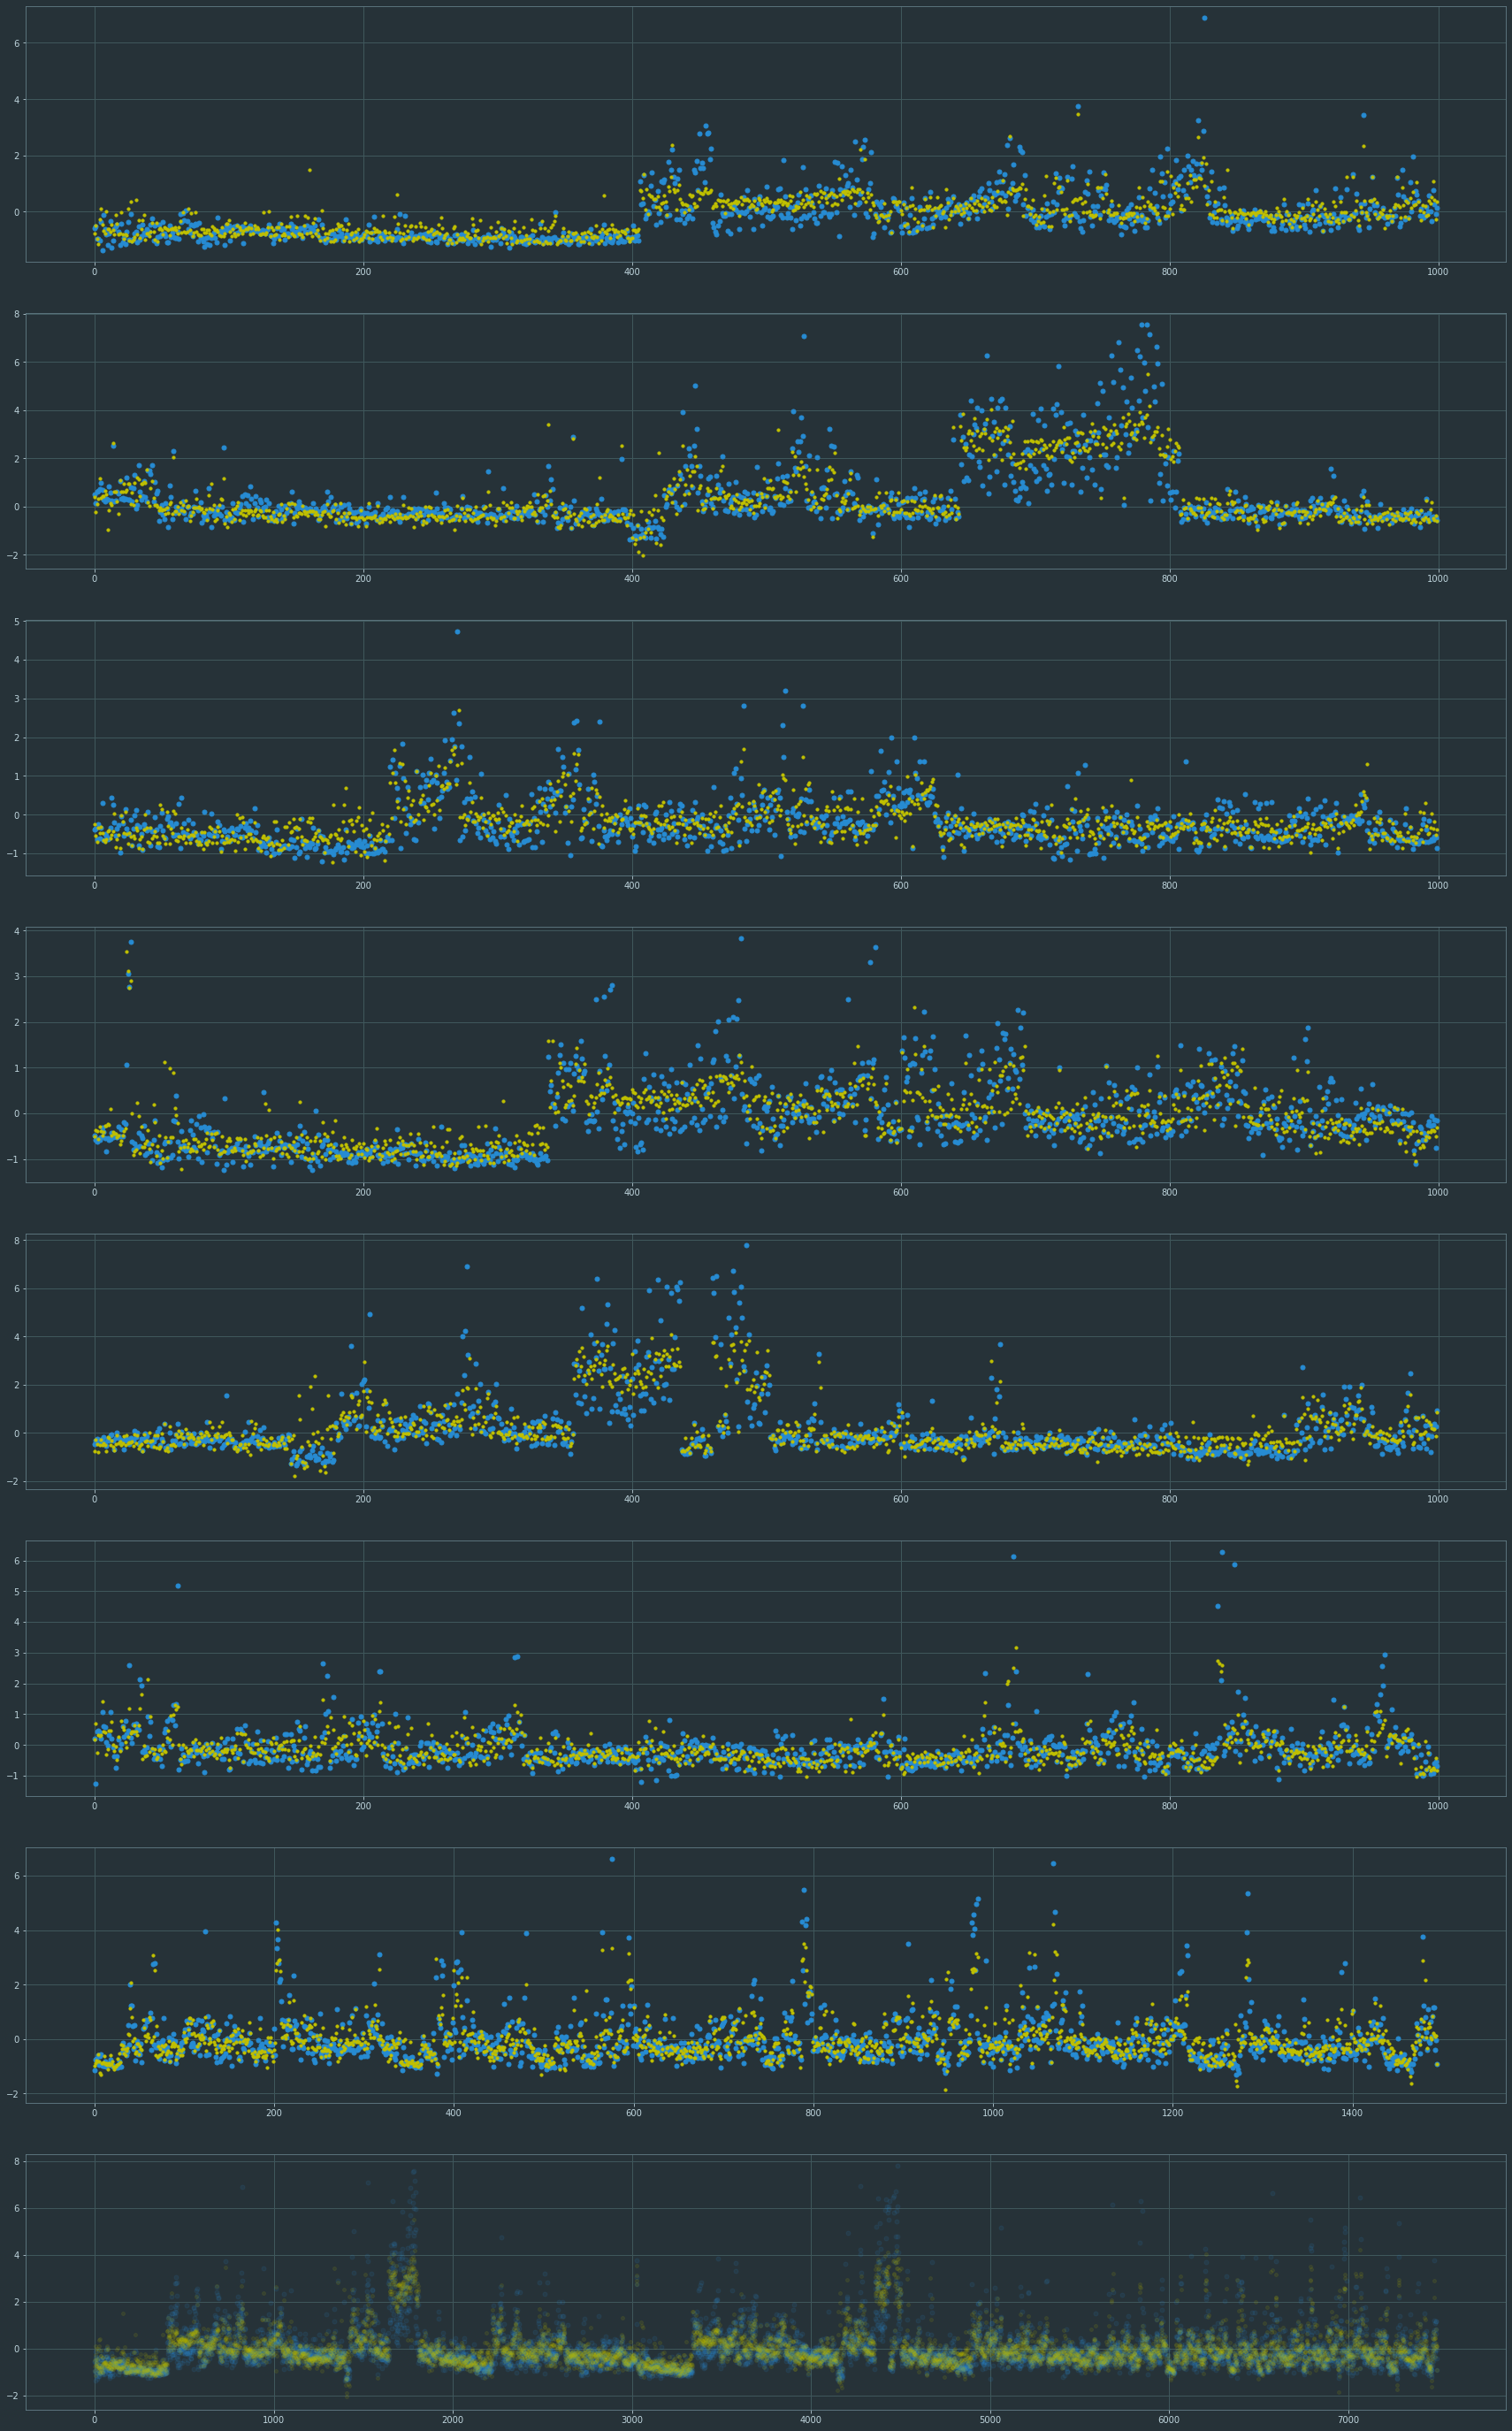

In [53]:
fig, plts = plt.subplots(nrows=8, ncols=1, figsize=(30, 50))

plts[7].scatter(range(len(y)), y, s=25, alpha=.1)
plts[7].scatter(range(len(y)), X.dot(w), s=15, c="y", alpha=.1)
plts[0].scatter(range(1000), y[:1000], s=25)
plts[0].scatter(range(1000), X.dot(w)[:1000], s=10, c="y")
plts[1].scatter(range(1000), y[1000:2000], s=25)
plts[1].scatter(range(1000), X.dot(w)[1000:2000], s=10, c="y")
plts[2].scatter(range(1000), y[2000:3000], s=25)
plts[2].scatter(range(1000), X.dot(w)[2000:3000], s=10, c="y")
plts[3].scatter(range(1000), y[3000:4000], s=25)
plts[3].scatter(range(1000), X.dot(w)[3000:4000], s=10, c="y")
plts[4].scatter(range(1000), y[4000:5000], s=25)
plts[4].scatter(range(1000), X.dot(w)[4000:5000], s=10, c="y")
plts[5].scatter(range(1000), y[5000:6000], s=25)
plts[5].scatter(range(1000), X.dot(w)[5000:6000], s=10, c="y")
plts[6].scatter(range(len(y[6000:])), y[6000:], s=25)
plts[6].scatter(range(len(y[6000:])), X.dot(w)[6000:], s=10, c="y");

In [52]:
sum((X.dot(w)-y)**2)/len(y)

0.3341444487621714